# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [181]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [182]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [183]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [184]:
project_data=project_data[pd.notnull(project_data['teacher_prefix'])]

In [185]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [186]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [187]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [188]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [189]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [108]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [190]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [191]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [192]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [193]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [194]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [196]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [199]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109245/109245 [02:31<00:00, 721.47it/s]


In [200]:
# after preprocesing
preprocessed_essays[20000]

'my wonderful students 3 4 5 years old we located small town outside charlotte nc all 22 students children school district employees my students bright energetic love learn they love hands activities get moving like preschoolers enjoy music creating different things all students come wonderful families supportive classroom our parents enjoy watching children growth much these materials help teach students life cycle butterfly we watch painted lady caterpillars grow bigger build chrysalis after weeks emerge chrysalis beautiful butterflies we already net chrysalises still need caterpillars feeding station this unforgettable experience students my student absolutely love hands materials they learn much getting touch manipulate different things the supporting materials i selected help students understand life cycle exploration nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [201]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:06<00:00, 16186.57it/s]


## 1.5 Preparing data for models

In [202]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

In [119]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109245, 9)


In [120]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109245, 30)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [122]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109245, 16623)


#### 1.5.2.2 TFIDF vectorizer

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [125]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [126]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [127]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109245/109245 [01:13<00:00, 1485.05it/s]


109245
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [128]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [129]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109245/109245 [08:44<00:00, 208.22it/s]


109245
300


In [130]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [203]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [204]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1152448166964, Standard deviation : 367.49642545627506


In [205]:
price_standardized

array([[-0.39052147],
       [ 0.00240752],
       [ 0.5952024 ],
       ...,
       [-0.1582471 ],
       [-0.61242839],
       [-0.51215531]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [134]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109245, 9)
(109245, 30)
(109245, 16623)
(109245, 1)


In [135]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109245, 16663)

__ Computing Sentiment Scores__

In [327]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<ol>
    <li><strong>Logistic Regression(either SGDClassifier with log loss) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
            <li>Summary of the Results Obtained</li>
        </ul>
</ol>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [206]:
project_data.drop('essay',axis=1,inplace=True)

In [207]:
project_data['essay']=preprocessed_essays
project_data['title']=preprocessed_title

In [208]:
y=project_data['project_is_approved']
project_data.drop('project_is_approved',axis=1,inplace=True)

In [245]:
print(y.value_counts())

1    92703
0    16542
Name: project_is_approved, dtype: int64


In [209]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import *

x_train,x_test,y_train,y_test=train_test_split(project_data,y,test_size=0.33,stratify=y)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.33,stratify=y_train)

print("Shape of Train Data is {0}".format(x_train.shape,y_train.shape))
print("Shape of CV Data is {0}".format(x_cv.shape,y_cv.shape))
print("Shape of Test Data is {0}".format(x_test.shape,y_test.shape))

project_data

Shape of Train Data is (49039, 20)
Shape of CV Data is (24155, 20)
Shape of Test Data is (36051, 20)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0           160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1           140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2            21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3               45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4           172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
5           141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           Mrs.   
6            21147  p099819  9b40170bfa65e399981717ee8731efc3           Mrs.   
7            94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2            Ms.   
8           112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
9           158561  p001713  140eeac1885c820ad5592a409a3a8994            Ms.   
10           43184  p040307  363788b51d40d978fe276bcb1f8a2b35           Mrs.   
11          127083  p251806  4ba7c721133ef651ca54a03551746708            Ms.   
12           19090  p051126  5e52c92b7e3c472aad247a239d345543           Mrs.   
13           15126  p003874  178f6ae765cd4e0fb143a77c47fd65e2           Mrs.   
14           62232  p233127  424819801de22a60bba7d0f4354d0258            Ms.   
15           67303  p132832  bb6d6d054824fa01576ab38dfa2be160            Ms.   
16          127215  p174627  4ad7e280fddff889e1355cc9f29c3b89           Mrs.   
17          157771  p152491  e39abda057354c979c5b075cffbe5f88            Ms.   
18          122186  p196421  fcd9b003fc1891383f340a89da02a1a6           Mrs.   
19          146331  p058343  8e07a98deb1bc74c75b97521e05b1691            Ms.   
20           75560  p052326  e0c1aad1f71badeff703fadc15f57680           Mrs.   
21          132078  p187097  2d4a4d2d774e5c2fdd25b2ba0e7341f8           Mrs.   
22           84810  p165540  30f08fbe02eba5453c4ce2e857e88eb4            Ms.   
23            8636  p219330  258ef2e6ab5ce007ac6764ce15d261ba            Mr.   
24           21478  p126524  74f8690562c44fc88f65f845b9fe61d0           Mrs.   
25           20142  p009037  b8bf3507cee960d5fedcb27719df2d59           Mrs.   
26           33903  p040091  7a0a5de5ed94e7036946b1ac3eaa99d0            Ms.   
27            1156  p161033  efdc3cf14d136473c9f62becc00d4cec        Teacher   
28           35430  p085706  22c8184c4660f1c589bea061d14b7f35           Mrs.   
29           22088  p032018  45f16a103f1e00b7439861d4e0728a59           Mrs.   
...            ...      ...                               ...            ...   
109215      127181  p077978  91f5c69bf72c82edb9bc1f55596d8d95           Mrs.   
109216       65838  p042022  9a6784108c76576565f46446594f99c4        Teacher   
109217       21062  p064087  19c622a38a0cd76c2e9dbcc40541fabd           Mrs.   
109218       81490  p117254  031e299278ac511616b2950fc1312a55        Teacher   
109219       69138  p152194  6f6e951e435aa9dc966091945414bcc4            Ms.   
109220        5110  p041136  6db62616b4ef6efc2310088f7ea0ae14            Ms.   
109221      109630  p257774  651866d8215616f65934aafcbee21bf5            Ms.   
109222      177841  p079425  c628dff071aa8028b08a5d4972bef2a1           Mrs.   
109223       65359  p085810  1d286ff10ee3982b2b47813f1e415ef2            Ms.   
109224       55643  p146149  e15cd063caa1ce11a45f2179535105f2           Mrs.   
109225      103666  p191845  d0603199630760d8d0eb003108208998           Mrs.   
109226      121219  p055363  523f95270c6aec82bee90e3931ceeeca           Mrs.   
109227      117282  p235512  ee59900af64d9244487e7ed87d0bc423            Ms.   
109228      170085  p248898  9d7a4dae637d1a170778e2db1515e574           Mrs.   
109229       36083  p204774  c116af7435274872bea9ff123a69cf6a           Mrs.   
109230      155847  p120664  b90258ab009b84e0dc11a7186d597141            Ms.   
109231       52918  p057638  dd68d9fbae85933c0173c13f66291cbe            Ms.   
109232       69971  p105083  9636fcacbf65eb393133a94c83c4a0d4           Mrs.   
109233  

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [210]:


#one hot encoding for School_State

vectorizer=CountVectorizer()
vectorizer.fit(x_train['school_state'].values)

school_state_features=vectorizer.get_feature_names()

x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(49039, 51) (49039,)
(24155, 51) (24155,)
(36051, 51) (36051,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [211]:
#One hot encoding on Teacher_prefix

vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector

x_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['teacher_prefix'].values)

teacher_prefix_features=vectorizer.get_feature_names()
print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49039, 5) (49039,)
(24155, 5) (24155,)
(36051, 5) (36051,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [212]:
#One hot encoding on project_grade_category
vocabulary=project_data['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=vocabulary,lowercase=False,binary=True)
vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# used the fitted CountVectorizer to convert the text to vector

x_train_project_grade_category_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_cv_project_grade_category_ohe = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_project_grade_category_ohe = vectorizer.transform(x_test['project_grade_category'].values)

project_grade_features=vectorizer.get_feature_names()

print("After vectorizations")
print(x_train_project_grade_category_ohe.shape, y_train.shape)
print(x_cv_project_grade_category_ohe.shape, y_cv.shape)
print(x_train_project_grade_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49039, 4) (49039,)
(24155, 4) (24155,)
(49039, 4) (36051,)
['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']


In [213]:
#One hot encoding on clean_categories

vocabulary=list(sorted_cat_dict.keys())
vectorizer = CountVectorizer(vocabulary=vocabulary,lowercase=False,binary=True)
vectorizer.fit(x_train['clean_categories'].values) # fit has to happen only on train data

# use the fitted CountVectorizer to convert the text to vector

x_train_clean_categories_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_cv_clean_categories_ohe = vectorizer.transform(x_cv['clean_categories'].values)
x_test_clean_categories_ohe = vectorizer.transform(x_test['clean_categories'].values)

clean_categories_features=vectorizer.get_feature_names()

print("After vectorizations")
print(x_train_clean_categories_ohe.shape, y_train.shape)
print(x_cv_clean_categories_ohe.shape, y_cv.shape)
print(x_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49039, 9) (49039,)
(24155, 9) (24155,)
(36051, 9) (36051,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [214]:
#One hot encoding on clean_subcategories
vocabulary=list(sorted_sub_cat_dict.keys())
vectorizer = CountVectorizer(vocabulary=vocabulary,lowercase=False,binary=True)
vectorizer.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data

# use the fitted CountVectorizer to convert the text to vector

x_train_clean_subcategories_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_cv_clean_subcategories_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcategories_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

clean_sub_features=vectorizer.get_feature_names()
print("After vectorizations")
print(x_train_clean_subcategories_ohe.shape, y_train.shape)
print(x_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(x_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49039, 30) (49039,)
(24155, 30) (24155,)
(36051, 30) (36051,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [215]:
# Column Standardization on Price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['price'].values.reshape(-1,1))

x_train_price_stand=scaler.transform(x_train['price'].values.reshape(-1,1))
x_cv_price_stand=scaler.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_stand=scaler.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_stand.shape, y_train.shape)
print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_price_stand.shape, y_test.shape)

After vectorizations
(49039, 1) (49039,)
(24155, 1) (24155,)
(36051, 1) (36051,)


In [216]:
#Performing column Standardization on Quantity

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train['quantity'].values.reshape(-1,1))

x_train_quan_stand=scaler.transform(x_train['quantity'].values.reshape(-1,1))
x_cv_quan_stand=scaler.transform(x_cv['quantity'].values.reshape(-1,1))
x_test_quan_stand=scaler.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quan_stand.shape, y_train.shape)
print(x_cv_quan_stand.shape, y_cv.shape)
print(x_test_quan_stand.shape, y_test.shape)
print((x_train_quan_stand))

After vectorizations
(49039, 1) (49039,)
(24155, 1) (24155,)
(36051, 1) (36051,)
[[-0.54258655]
 [-0.46536001]
 [-0.19506713]
 ...
 [ 0.53858499]
 [-0.46536001]
 [-0.61981309]]


In [217]:
#Performing column Standardization on teacher_number_of_previously_posted_projects

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_prev_subj_stand=scaler.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv_prev_subj_stand=scaler.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_prev_subj_stand=scaler.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_prev_subj_stand.shape, y_train.shape)
print(x_cv_prev_subj_stand.shape, y_cv.shape)
print(x_test_prev_subj_stand.shape, y_test.shape)

After vectorizations
(49039, 1) (49039,)
(24155, 1) (24155,)
(36051, 1) (36051,)


In [228]:
#text Vectorization for Project tilte with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,3))
vectorizer.fit(x_train['title'].values)

x_train_title_bow = vectorizer.transform(x_train['title'].values)
x_cv_title_bow = vectorizer.transform(x_cv['title'].values)
x_test_title_bow = vectorizer.transform(x_test['title'].values)

print("After vectorizations")
print(x_train_title_bow.shape, y_train.shape)
print(x_cv_title_bow.shape, y_cv.shape)
print(x_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49039, 4034) (49039,)
(24155, 4034) (24155,)
(36051, 4034) (36051,)


In [229]:
#Text vectorization on preprocessed_essay with BOW

#BOW for project_title
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['essay'].values)

x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_cv_essay_bow = vectorizer.transform(x_cv['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49039, 5000) (49039,)
(24155, 5000) (24155,)
(36051, 5000) (36051,)


In [230]:
#TFIDF for essay
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(x_train['essay'].values)

x_train_essay_tfidf = vectorizer.transform(x_train['essay'].values)
x_cv_essay_tfidf = vectorizer.transform(x_cv['essay'].values)
x_test_essay_tfidf = vectorizer.transform(x_test['essay'].values)

print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_cv_essay_tfidf.shape, y_cv.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49039, 5000) (49039,)
(24155, 5000) (24155,)
(36051, 5000) (36051,)


In [231]:
#TFIDF on project_title
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,3))
vectorizer.fit(x_train['title'].values)

x_train_title_tfidf = vectorizer.transform(x_train['title'].values)
x_cv_title_tfidf = vectorizer.transform(x_cv['title'].values)
x_test_title_tfidf = vectorizer.transform(x_test['title'].values)

print("After vectorizations")
print(x_train_title_tfidf.shape, y_train.shape)
print(x_cv_title_tfidf.shape, y_cv.shape)
print(x_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49039, 4034) (49039,)
(24155, 4034) (24155,)
(36051, 4034) (36051,)


In [232]:
from scipy.sparse import hstack


x_tr_bow=hstack((x_train_title_bow,x_train_essay_bow,x_train_clean_subcategories_ohe,x_train_clean_categories_ohe,x_train_project_grade_category_ohe,x_train_teacher_ohe,x_train_state_ohe,x_train_prev_subj_stand,x_train_quan_stand,x_train_price_stand)).tocsr()
x_te_bow=hstack((x_test_title_bow,x_test_essay_bow,x_test_clean_subcategories_ohe,x_test_clean_categories_ohe,x_test_project_grade_category_ohe,x_test_teacher_ohe,x_test_state_ohe,x_test_prev_subj_stand,x_test_quan_stand,x_test_price_stand)).tocsr()
x_cv_bow=hstack((x_cv_title_bow,x_cv_essay_bow,x_cv_clean_subcategories_ohe,x_cv_clean_categories_ohe,x_cv_project_grade_category_ohe,x_cv_teacher_ohe,x_cv_state_ohe,x_cv_prev_subj_stand,x_cv_quan_stand,x_cv_price_stand)).tocsr()

print("Final Data matrix")
print(x_tr_bow.shape, y_train.shape)
print(x_cv_bow.shape, y_cv.shape)
print(x_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(49039, 9136) (49039,)
(24155, 9136) (24155,)
(36051, 9136) (36051,)


In [233]:
from scipy.sparse import hstack


x_tr_tfidf=hstack((x_train_title_tfidf,x_train_essay_tfidf,x_train_clean_subcategories_ohe,x_train_clean_categories_ohe,x_train_project_grade_category_ohe,x_train_teacher_ohe,x_train_state_ohe,x_train_prev_subj_stand,x_train_quan_stand,x_train_price_stand)).tocsr()
x_te_tfidf=hstack((x_test_title_tfidf,x_test_essay_tfidf,x_test_clean_subcategories_ohe,x_test_clean_categories_ohe,x_test_project_grade_category_ohe,x_test_teacher_ohe,x_test_state_ohe,x_test_prev_subj_stand,x_test_quan_stand,x_test_price_stand)).tocsr()
x_cv_tfidf=hstack((x_cv_title_tfidf,x_cv_essay_tfidf,x_cv_clean_subcategories_ohe,x_cv_clean_categories_ohe,x_cv_project_grade_category_ohe,x_cv_teacher_ohe,x_cv_state_ohe,x_cv_prev_subj_stand,x_cv_quan_stand,x_cv_price_stand)).tocsr()

print("Final Data matrix")
print(x_tr_tfidf.shape, y_train.shape)
print(x_cv_tfidf.shape, y_cv.shape)
print(x_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(49039, 9136) (49039,)
(24155, 9136) (24155,)
(36051, 9136) (36051,)


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>


<h1>Logistic Regression with BOW representation of text</h1>

In [234]:
#Finding the Best possible value of Hyperparameter(HyperParameter tuning)

from sklearn.metrics import roc_auc_score
train_auc=[]
cv_auc=[]
c_list=[10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)]
for i in c_list:
    clf=LogisticRegression(C=i,class_weight='balanced')
    clf.fit(x_tr_bow,y_train)
    y_train_pred=clf.predict_proba(x_tr_bow)[:,1]
    y_cv_pred=clf.predict_proba(x_cv_bow)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

In [ ]:

plt.plot(np.log10(c_list), train_auc, label='Train AUC')
plt.plot(np.log10(c_list), cv_auc, label='CV AUC')

plt.scatter(np.log10(c_list), train_auc, label='Train AUC points')
plt.scatter(np.log10(c_list), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(BOW)")
plt.grid()
plt.show()

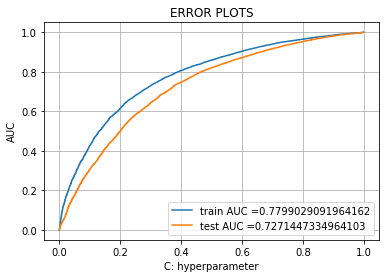

In [237]:
best_c=10**-3

from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

clf_final=LogisticRegression(C=best_c,class_weight='balanced')
clf_final.fit(x_tr_bow,y_train)

y_train_pred=clf_final.predict_proba(x_tr_bow)[:,1]
y_test_pred=clf_final.predict_proba(x_te_bow)[:,1]

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [238]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [239]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds_bow, train_fpr_bow, train_fpr_bow))
print("Test confusion matrix")
cm_test=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds_bow, test_fpr_bow, test_fpr_bow))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999546531537 for threshold 0.413
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999244983697 for threshold 0.461


1    41614
0     7425
Name: project_is_approved, dtype: int64


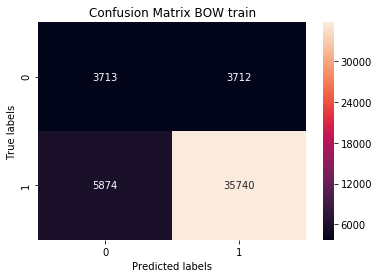

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_train.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix BOW train'); 


1    30592
0     5459
Name: project_is_approved, dtype: int64


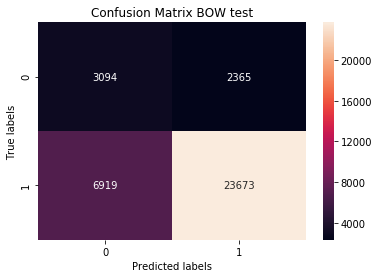

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_test.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix BOW test'); 


<h1>Logistic Regression with TFIDF representation of text</h1>

In [250]:


#Finding the Best possible value of Hyperparameter(HyperParameter tuning)(TFIDF)

from sklearn.metrics import roc_auc_score
train_auc_tfidf=[]
cv_auc_tfidf=[]
c_list=[10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)]
for i in c_list:
    clf=LogisticRegression(C=i,class_weight='balanced')
    clf.fit(x_tr_tfidf,y_train)
    y_train_pred=clf.predict_proba(x_tr_tfidf)[:,1]
    y_cv_pred=clf.predict_proba(x_cv_tfidf)[:,1]
    train_auc_tfidf.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_tfidf.append(roc_auc_score(y_cv,y_cv_pred))

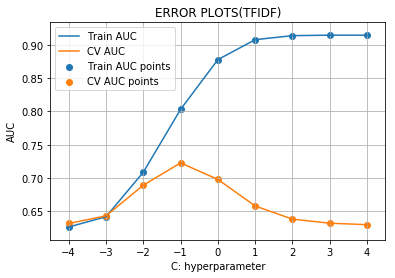

In [252]:

plt.plot(np.log10(c_list), train_auc_tfidf, label='Train AUC')
plt.plot(np.log10(c_list), cv_auc_tfidf, label='CV AUC')

plt.scatter(np.log10(c_list), train_auc_tfidf, label='Train AUC points')
plt.scatter(np.log10(c_list), cv_auc_tfidf, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(TFIDF)")
plt.grid()
plt.show()

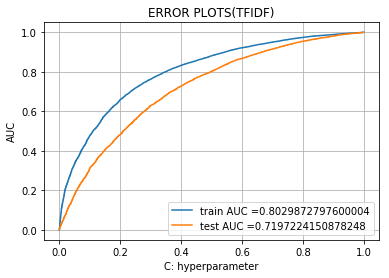

In [253]:
best_c=0.1

from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

clf_tfidf=LogisticRegression(C=best_c,class_weight='balanced')
clf_tfidf.fit(x_tr_tfidf,y_train)

y_train_pred_tfidf=clf_tfidf.predict_proba(x_tr_tfidf)[:,1]
y_test_pred_tfidf=clf_tfidf.predict_proba(x_te_tfidf)[:,1]

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(TFIDF)")
plt.grid()
plt.show()

In [545]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, predict(y_train_pred_tfidf, tr_thresholds_tfidf, train_fpr_tfidf, train_fpr_tfidf))
print("Test confusion matrix")
cm_test=confusion_matrix(y_test, predict(y_test_pred_tfidf, tr_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999546531537 for threshold 0.405
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.452


1    41614
0     7425
Name: project_is_approved, dtype: int64


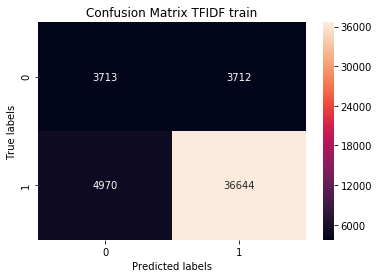

In [546]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_train.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix TFIDF train'); 


1    30592
0     5459
Name: project_is_approved, dtype: int64


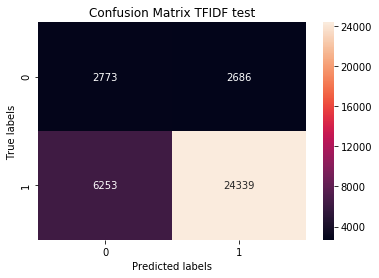

In [547]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_test.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix TFIDF test'); 


<h1>Logistic Regression with AverageWord2Vec representation of text</h1>

In [263]:
def avgw2vecessay(preprocessed_essays):
    
    from tqdm import tqdm
    avg_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_vectors_essay_train.append(vector)
        
    return avg_vectors_essay_train

In [278]:
def avgw2vectitle(preprocessed_title):
    from tqdm import tqdm
    avg_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in (preprocessed_title): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_vectors_title .append(vector)
    return avg_vectors_title

In [274]:
avgw2vec_train_essays=avgw2vecessay(x_train['essay'].values)
avgw2vec_cv_essays=avgw2vecessay(x_cv['essay'].values)
avgw2vec_test_essays=avgw2vecessay(x_test['essay'].values)


 53%|██████████████████████████████████████▊                                   | 25752/49039 [00:14<00:13, 1765.82it/s]


 15%|███████████                                                                | 3582/24155 [00:01<00:11, 1787.51it/s]


 16%|████████████                                                               | 5824/36051 [00:03<00:15, 1896.40it/s]


 92%|████████████████████████████████████████████████████████████████████▎     | 33268/36051 [00:17<00:01, 2305.32it/s]


100%|██████████████████████████████████████████████████████████████████████████| 36051/36051 [00:18<00:00, 1923.32it/s]

In [279]:
avgw2vec_train_title=avgw2vectitle(x_train['title'].values)
avgw2vec_cv_title=avgw2vectitle(x_cv['title'].values)
avgw2vec_test_title=avgw2vectitle(x_test['title'].values)

In [282]:


from scipy.sparse import hstack


x_tr_word=hstack((avgw2vec_train_title,avgw2vec_train_essays,x_train_clean_subcategories_ohe,x_train_clean_categories_ohe,x_train_project_grade_category_ohe,x_train_teacher_ohe,x_train_state_ohe,x_train_prev_subj_stand,x_train_quan_stand,x_train_price_stand)).tocsr()
x_te_word=hstack((avgw2vec_test_title,avgw2vec_test_essays,x_test_clean_subcategories_ohe,x_test_clean_categories_ohe,x_test_project_grade_category_ohe,x_test_teacher_ohe,x_test_state_ohe,x_test_prev_subj_stand,x_test_quan_stand,x_test_price_stand)).tocsr()
x_cv_word=hstack((avgw2vec_cv_title,avgw2vec_cv_essays,x_cv_clean_subcategories_ohe,x_cv_clean_categories_ohe,x_cv_project_grade_category_ohe,x_cv_teacher_ohe,x_cv_state_ohe,x_cv_prev_subj_stand,x_cv_quan_stand,x_cv_price_stand)).tocsr()
print("Final Data matrix")
print(x_tr_word.shape, y_train.shape)
print(x_cv_word.shape, y_cv.shape)
print(x_te_word.shape, y_test.shape)
print("="*100)

Final Data matrix
(49039, 702) (49039,)
(24155, 702) (24155,)
(36051, 702) (36051,)


In [287]:
#Hyperparmeter tuning on Averagew2vec Model for C parameter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

train_auc_word=[]
cv_auc_word=[]

c_list=[10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)]
for i in c_list:
    clf=LogisticRegression(C=i,class_weight='balanced')
    clf.fit(x_tr_word,y_train)
    y_train_pred=clf.predict_proba(x_tr_word)[:,1]
    y_cv_pred_=clf.predict_proba(x_cv_word)[:,1]
    train_auc_word.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_word.append(roc_auc_score(y_cv,y_cv_pred))

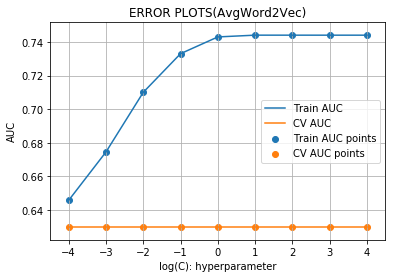

In [305]:

plt.plot(np.log10(c_list), train_auc_word, label='Train AUC')
plt.plot(np.log10(c_list), cv_auc_word, label='CV AUC')

plt.scatter(np.log10(c_list), train_auc_word, label='Train AUC points')
plt.scatter(np.log10(c_list), cv_auc_word, label='CV AUC points')

plt.legend()
plt.xlabel("log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(AvgWord2Vec)")
plt.grid()
plt.show()

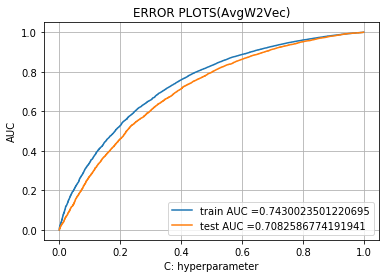

In [301]:

best_c=10**0

from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

clf_word=LogisticRegression(C=best_c,class_weight='balanced')
clf_word.fit(x_tr_word,y_train)

y_train_pred_word=clf_word.predict_proba(x_tr_word)[:,1]
y_test_pred_word=clf_word.predict_proba(x_te_word)[:,1]

train_fpr_word, train_tpr_word, tr_thresholds_word = roc_curve(y_train, y_train_pred_word)
test_fpr_word, test_tpr_word, te_thresholds_word = roc_curve(y_test, y_test_pred_word)

plt.plot(train_fpr_word, train_tpr_word, label="train AUC ="+str(auc(train_fpr_word, train_tpr_word)))
plt.plot(test_fpr_word, test_tpr_word, label="test AUC ="+str(auc(test_fpr_word, test_tpr_word)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(AvgW2Vec)")
plt.grid()
plt.show()

In [548]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, predict(y_train_pred_word, tr_thresholds_word, train_fpr_word, train_fpr_word))
print("Test confusion matrix")
cm_test=confusion_matrix(y_test, predict(y_test_pred_word, tr_thresholds_word, test_fpr_word, test_fpr_word))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999546531537 for threshold 0.396
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.47


1    41614
0     7425
Name: project_is_approved, dtype: int64


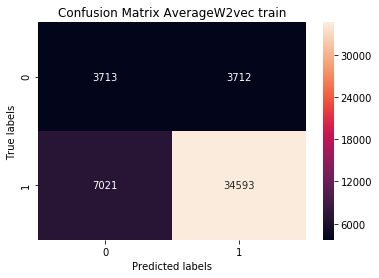

In [549]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_train.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix AverageW2vec train'); 


1    30592
0     5459
Name: project_is_approved, dtype: int64


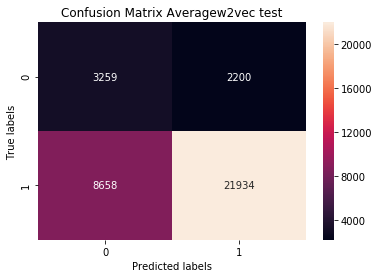

In [550]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_test.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Averagew2vec test'); 


<h1>Logistic Regression with TFIDFWeightedWord2Vec representation of text</h1>

In [310]:
#tfidf weighted Word2vec for essays

def tfidfessays(preprocessed_essays):
    from tqdm import tqdm
    tfidf_w2v1_essays = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        tfidf_w2v1_essays.append(vector)
    return tfidf_w2v1_essays

In [311]:

def tfidftitle(preprocessed_title):
    from tqdm import tqdm
    tfidf_w2v1_title = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_title): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        tfidf_w2v1_title.append(vector)
    return tfidf_w2v1_title

In [312]:
tfidfw2vec_essays_train=tfidfessays(x_train['essay'].values)
tfidfw2vec_essays_cv=tfidfessays(x_cv['essay'].values)
tfidfw2vec_essays_test=tfidfessays(x_test['essay'].values)


 45%|█████████████████████████████████▏                                        | 22019/49039 [00:14<00:16, 1640.16it/s]


 94%|█████████████████████████████████████████████████████████████████████▉    | 46313/49039 [00:28<00:01, 1807.58it/s]


 85%|██████████████████████████████████████████████████████████████▊           | 20523/24155 [00:12<00:02, 1753.96it/s]


 55%|████████████████████████████████████████▉                                 | 19924/36051 [00:11<00:09, 1720.38it/s]


100%|██████████████████████████████████████████████████████████████████████████| 36051/36051 [00:21<00:00, 1687.58it/s]

In [313]:
tfidfw2vec_title_train=tfidftitle(x_train['title'].values)
tfidfw2vec_title_cv=tfidftitle(x_cv['title'].values)
tfidfw2vec_title_test=tfidftitle(x_test['title'].values)


100%|█████████████████████████████████████████████████████████████████████████| 36051/36051 [00:01<00:00, 30373.31it/s]

In [315]:
from scipy.sparse import hstack


x_tr_tfidfw2vec=hstack((tfidfw2vec_essays_train,tfidfw2vec_title_train,x_train_clean_subcategories_ohe,x_train_clean_categories_ohe,x_train_project_grade_category_ohe,x_train_teacher_ohe,x_train_state_ohe,x_train_prev_subj_stand,x_train_quan_stand,x_train_price_stand)).tocsr()
x_te_tfidfw2vec=hstack((tfidfw2vec_essays_test,tfidfw2vec_title_test,x_test_clean_subcategories_ohe,x_test_clean_categories_ohe,x_test_project_grade_category_ohe,x_test_teacher_ohe,x_test_state_ohe,x_test_prev_subj_stand,x_test_quan_stand,x_test_price_stand)).tocsr()
x_cv_tfidfw2vec=hstack((tfidfw2vec_essays_cv,tfidfw2vec_title_cv,x_cv_clean_subcategories_ohe,x_cv_clean_categories_ohe,x_cv_project_grade_category_ohe,x_cv_teacher_ohe,x_cv_state_ohe,x_cv_prev_subj_stand,x_cv_quan_stand,x_cv_price_stand)).tocsr()

print("Final Data matrix")
print(x_tr_tfidfw2vec.shape, y_train.shape)
print(x_cv_tfidfw2vec.shape, y_cv.shape)
print(x_te_tfidfw2vec.shape, y_test.shape)
print("="*100)

Final Data matrix
(49039, 702) (49039,)
(24155, 702) (24155,)
(36051, 702) (36051,)


In [316]:
#Finding the Best possible value of Hyperparameter(HyperParameter tuning)

from sklearn.metrics import roc_auc_score
train_auc_tfidf_word=[]
cv_auc_tfidf_word=[]
c_list=[10**(-4),10**(-3),10**(-2),10**(-1),0.5,10**(0),10**(1),10**(2),10**(3),10**(4)]
for i in c_list:
    clf=LogisticRegression(C=i,class_weight='balanced')
    clf.fit(x_tr_tfidfw2vec,y_train)
    y_train_pred=clf.predict_proba(x_tr_tfidfw2vec)[:,1]
    y_cv_pred=clf.predict_proba(x_cv_tfidfw2vec)[:,1]
    train_auc_tfidf_word.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_tfidf_word.append(roc_auc_score(y_cv,y_cv_pred))

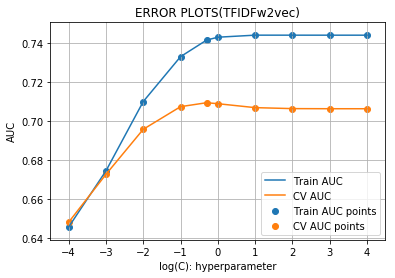

In [551]:

plt.plot(np.log10(c_list), train_auc_tfidf_word, label='Train AUC')
plt.plot(np.log10(c_list), cv_auc_tfidf_word, label='CV AUC')

plt.scatter(np.log10(c_list), train_auc_tfidf_word, label='Train AUC points')
plt.scatter(np.log10(c_list), cv_auc_tfidf_word, label='CV AUC points')

plt.legend()
plt.xlabel("log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(TFIDFw2vec)")
plt.grid()
plt.show()

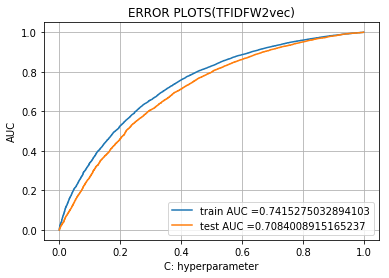

In [320]:
best_c=0.5

from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

clf_tfidf_word=LogisticRegression(C=best_c,class_weight='balanced')
clf_tfidf_word.fit(x_tr_tfidfw2vec,y_train)

y_train_pred_tfidf_word=clf_tfidf_word.predict_proba(x_tr_tfidfw2vec)[:,1]
y_test_pred_tfidf_word=clf_tfidf_word.predict_proba(x_te_tfidfw2vec)[:,1]

train_fpr_tfidf_word, train_tpr_tfidf_word, tr_thresholds_tfidf_word = roc_curve(y_train, y_train_pred_tfidf_word)
test_fpr_tfidf_word, test_tpr_tfidf_word, te_thresholds_tfidf_word = roc_curve(y_test, y_test_pred_tfidf_word)

plt.plot(train_fpr_tfidf_word, train_tpr_tfidf_word, label="train AUC ="+str(auc(train_fpr_tfidf_word, train_tpr_tfidf_word)))
plt.plot(test_fpr_tfidf_word,test_tpr_tfidf_word, label="test AUC ="+str(auc(test_fpr_tfidf_word, test_tpr_tfidf_word)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(TFIDFW2vec)")
plt.grid()
plt.show()

In [554]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train_tfidf_word=confusion_matrix(y_train, predict(y_train_pred_tfidf_word, tr_thresholds_tfidf_word, train_fpr_tfidf_word, train_fpr_tfidf_word))
print("Test confusion matrix")
cm_test_tfidf_word=confusion_matrix(y_test, predict(y_test_pred_tfidf_word, tr_thresholds_tfidf_word, test_fpr_tfidf_word, test_fpr_tfidf_word))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999546531537 for threshold 0.4
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.472


1    41614
0     7425
Name: project_is_approved, dtype: int64


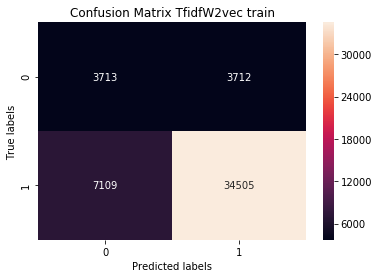

In [555]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train_tfidf_word, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_train.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix TfidfW2vec train'); 


1    30592
0     5459
Name: project_is_approved, dtype: int64


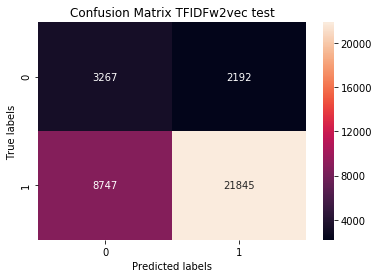

In [556]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_test_tfidf_word, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_test.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix TFIDFw2vec test'); 


In [331]:

def count_words(essays):
    
    total_essay=[]
    for i in essays:
        count=0
        for word in i:
            count=count+1
        total_essay.append(count)
    return total_essay

In [446]:
#Word Count for each essay
essay_words_train=count_words(x_train['essay'].values)
essay_words_cv=count_words(x_cv['essay'].values)
essay_words_test=count_words(x_test['essay'].values)
print(len(essay_words_test))

36051


In [437]:
#Word Count for each title
title_words_train=count_words(x_train['title'].values)
title_words_cv=count_words(x_cv['title'].values)
title_words_test=count_words(x_test['title'].values)

In [343]:
#SentimentIntensityAnalyzer for each essay



def getsentiment(essays):
    
    analyser = SentimentIntensityAnalyzer()
    sentiment_list=[]
    for essay in essays:
        sent=analyser.polarity_scores(essay)
        sentiment_list.append(sent)
    return sentiment_list

In [345]:
sentiment_essay_train=getsentiment(x_train['essay'].values)
sentiment_essay_cv=getsentiment(x_cv['essay'].values)
sentiment_essay_test=getsentiment(x_test['essay'].values)

In [438]:
def getsentiments(sentiment_essay):
    pos_train=[]
    neg_train=[]
    compound_train=[]
    neu_train=[]
    for item in sentiment_essay:
        neg_train.append(item['neg'])
        pos_train.append(item['pos'])
        compound_train.append(item['compound'])
        neu_train.append(item['neu'])
    return neg_train,pos_train,compound_train,neu_train

In [439]:
neg_train,pos_train,compound_train,neu_train=getsentiments(sentiment_essay_train)
neg_cv,pos_cv ,compound_cv,neu_cv=getsentiments(sentiment_essay_cv)


In [478]:
neg_test,pos_test, compound_test, neu_test=getsentiments(sentiment_essay_test)

In [440]:
print(x_train_clean_categories_ohe.shape)
print(x_train_clean_subcategories_ohe.shape)
print(x_train_project_grade_category_ohe.shape)

(49039, 9)
(49039, 30)
(49039, 4)


In [441]:
print(x_train_teacher_ohe.shape)
print(x_train_state_ohe.shape)
print(x_train_prev_subj_stand.shape)
print(x_train_quan_stand.shape)

(49039, 5)
(49039, 51)
(49039, 1)
(49039, 1)


In [494]:
def tranpose(essay_words_train):
    essay_words_train=np.array(essay_words_train).reshape(49039,1)
    return np.array(essay_words_train)

In [495]:
def tranpose_test(essay_words_test_1):
    essay_words_test_1=(np.array(essay_words_test_1)).reshape(36051,1)
    return np.array(essay_words_test)

In [496]:
def tranpose_cv(essay_words_cv):
    essay_words_cv=np.array(essay_words_cv).reshape(24155,1)
    return np.array(essay_words_cv)

In [499]:
essay_words_train=tranpose(essay_words_train)
essay_words_test=tranpose_test(essay_words_test)
essay_words_cv=tranpose_cv(essay_words_cv)

In [500]:
title_words_train=tranpose(title_words_train)
title_words_test=tranpose_test(title_words_test)
title_words_cv=tranpose_cv(title_words_cv)

In [501]:
pos_train=tranpose(pos_train)
pos_test=tranpose_test(pos_test)
pos_cv=tranpose_cv(pos_cv)

In [502]:
neg_train=tranpose(neg_train)
neg_test=tranpose_test(neg_test)
neg_cv=tranpose_cv(neg_cv)

In [503]:
compound_train=tranpose(compound_train)
compound_test=tranpose_test(compound_test)
compound_cv=tranpose_cv(compound_cv)

In [523]:
neu_train=tranpose(neu_train)
neu_test1=tranpose_test(neu_test)
neu_cv=tranpose_cv(neu_cv)

In [528]:
essay1_words_test=essay_words_test
neu_test1=neu_test.reshape(36051,1)
pos_test1=pos_test.reshape(36051,1)
neg_test1=neg_test.reshape(36051,1)
compound_test1=compound_test.reshape(36051,1)
title_words_test1=title_words_test.reshape(36051,1)
essay_words_test1=essay_words_test.reshape(36051,1)

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [530]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


from scipy.sparse import hstack

print(essay_words_test.shape)
x_tr_5=hstack((x_train_clean_subcategories_ohe,x_train_clean_categories_ohe,x_train_project_grade_category_ohe,x_train_teacher_ohe,x_train_state_ohe,x_train_prev_subj_stand,x_train_quan_stand,x_train_price_stand,(essay_words_train),(title_words_train),(neg_train),(pos_train),(compound_train),(neu_train))).tocsr()
x_te_5=hstack((x_test_clean_subcategories_ohe,x_test_clean_categories_ohe,x_test_project_grade_category_ohe,x_test_teacher_ohe,x_test_state_ohe,x_test_prev_subj_stand,x_test_quan_stand,x_test_price_stand,neu_test1,pos_test1,neg_test1,compound_test1,essay_words_test1,title_words_test1)).tocsr()
x_cv_5=hstack((x_cv_clean_subcategories_ohe,x_cv_clean_categories_ohe,x_cv_project_grade_category_ohe,x_cv_teacher_ohe,x_cv_state_ohe,x_cv_prev_subj_stand,x_cv_quan_stand,x_cv_price_stand,(essay_words_cv),(title_words_cv),(neg_cv),(pos_cv),(compound_cv),(neu_cv))).tocsr()

print("Final Data matrix")
print(x_tr_5.shape, y_train.shape)
print(x_cv_5.shape, y_cv.shape)
print(x_te_5.shape, y_test.shape)
print("="*100)


(36051,)
Final Data matrix
(49039, 108) (49039,)
(24155, 108) (24155,)
(36051, 108) (36051,)


In [532]:
#Hyperparameter tuning for feature set 5(i.e without text data)

from sklearn.metrics import roc_auc_score
train_auc_5=[]
cv_auc_5=[]
c_list=[10**(-4),10**(-3),10**(-2),10**(-1),0.5,10**(0),10**(1),10**(2),10**(3),10**(4)]
for i in c_list:
    clf=LogisticRegression(C=i,class_weight='balanced')
    clf.fit(x_tr_5,y_train)
    y_train_pred_5=clf.predict_proba(x_tr_5)[:,1]
    y_cv_pred_5=clf.predict_proba(x_cv_5)[:,1]
    train_auc_5.append(roc_auc_score(y_train,y_train_pred_5))
    cv_auc_5.append(roc_auc_score(y_cv,y_cv_pred_5))

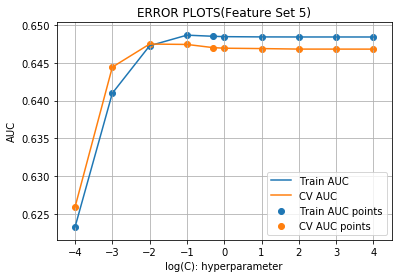

In [533]:

plt.plot(np.log10(c_list), train_auc_5, label='Train AUC')
plt.plot(np.log10(c_list), cv_auc_5, label='CV AUC')

plt.scatter(np.log10(c_list), train_auc_5, label='Train AUC points')
plt.scatter(np.log10(c_list), cv_auc_5, label='CV AUC points')

plt.legend()
plt.xlabel("log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS(Feature Set 5)")
plt.grid()
plt.show()

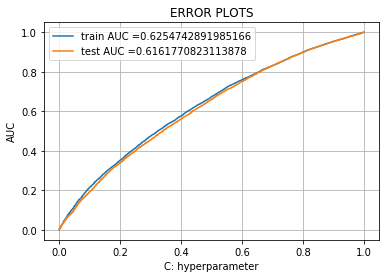

In [534]:
best_c=10**-2

from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

clf_final_5=LogisticRegression(C=best_c,class_weight='balanced')
clf_final_5.fit(x_tr_bow,y_train)

y_train_pred_5=clf_final_5.predict_proba(x_tr_bow)[:,1]
y_test_pred_5=clf_final_5.predict_proba(x_te_bow)[:,1]

train_fpr_5, train_tpr_5, tr_thresholds_5 = roc_curve(y_train, y_train_pred_5)
test_fpr_5, test_tpr_5, te_thresholds_5 = roc_curve(y_test, y_test_pred_5)

plt.plot(train_fpr_5, train_tpr_5, label="train AUC ="+str(auc(train_fpr_5, train_tpr_5)))
plt.plot(test_fpr_5, test_tpr_5, label="test AUC ="+str(auc(test_fpr_5, test_tpr_5)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [559]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm_train_5=confusion_matrix(y_train, predict(y_train_pred_5, tr_thresholds_5, train_fpr_5, train_fpr_5))
print("Test confusion matrix")
cm_test_5=confusion_matrix(y_test, predict(y_test_pred_5, tr_thresholds_5, test_fpr_5, test_fpr_5))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999546531537 for threshold 0.483
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.512


1    41614
0     7425
Name: project_is_approved, dtype: int64


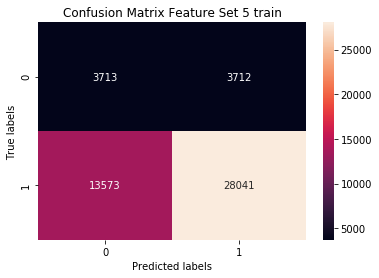

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train_5, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_train.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Feature Set 5 train'); 

1    30592
0     5459
Name: project_is_approved, dtype: int64


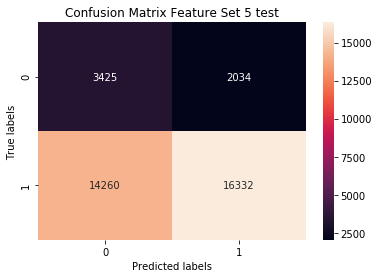

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_test_5, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
print(y_test.value_counts())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Feature Set 5 test'); 

<h1>3. Conclusion</h1>

In [1]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "HyperParameter", "AUC(test)"]

x.add_row(["BOW", "LogisticRegression", 0.0001, 0.723])
x.add_row(["TFIDF", "Logistic Regression", 0.1, 0.719])
x.add_row(["AvgW2Vec","Logistic Regression",1 ,0.70825])
x.add_row(["TFIDFW2vec","Logistic Regression",0.5,0.7084])
x.add_row(["FeatureSet5(without text data)","Logistic Regression",0.01 ,0.62])

print(x)

+--------------------------------+---------------------+----------------+-----------+
|           Vectorizer           |        Model        | HyperParameter | AUC(test) |
+--------------------------------+---------------------+----------------+-----------+
|              BOW               |  LogisticRegression |     0.0001     |   0.723   |
|             TFIDF              | Logistic Regression |      0.1       |   0.719   |
|            AvgW2Vec            | Logistic Regression |       1        |  0.70825  |
|           TFIDFW2vec           | Logistic Regression |      0.5       |   0.7084  |
| FeatureSet5(without text data) | Logistic Regression |      0.01      |    0.62   |
+--------------------------------+---------------------+----------------+-----------+


1.As the AUC score  was reduced in feature set 5 i.e when we did not take textual data,It seems like project_title and project_essays are one of the most important feature here and we cannot neglect such features while Modelling 